# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.3.2'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [440]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [403]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [983]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [67]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


In [130]:
actor, actress = cast['type'].value_counts()
actress

1253495

## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [815]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [744]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [5]:
len(movies)

244914

### List all Batman movies ever made

In [1005]:
batman_df = movies[movies.title.str.contains('Batman')]
print('Total Batman Movies:', len(batman_df))
batman_df.title.to_list()

Total Batman Movies: 35


['Batman: Anarchy',
 'Batman Forever',
 'Batman Untold',
 'Scooby-Doo & Batman: the Brave and the Bold',
 'Batman the Rise of Red Hood',
 'Batman: Return of the Caped Crusaders',
 'Batman & Robin',
 'Batman Revealed',
 'Batman',
 'Batman Beyond: Rising Knight',
 'Batman Fights Dracula',
 'Batman: Crusader',
 'Batman: Mask of the Phantasm',
 'Batman: Master of Fear',
 'James Batman',
 'Batman Ninja',
 'Batman: The Final Victory',
 'Alyas Batman at Robin',
 'Batman Unveiled',
 'Batman and Robin',
 'B@ (Batman Parody Film)',
 'Batman Reboots',
 'Batman V Superman: League at War',
 'Batman',
 'Alyas Batman en Robin',
 'Batman Returns',
 'Batman Dracula',
 'Batman: The Movie',
 'Fight! Batman, Fight!',
 'The LEGO Batman Movie',
 'Batman the Dawn of the Knight',
 "B@: It's a Wonderful Life, Batman!",
 'Batman Begins',
 'Batman: The Killing Joke',
 'Batman v Superman: Dawn of Justice']

### List all Batman movies ever made - the right approach

In [7]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [ ]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
movies[movies.title.str.contains('Harry Potter', case=False)].sort_values('year', ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [ ]:
len(movies[movies.year == 2017])

### Section I - Q2 : How many movies were made in the year 2015?

In [14]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [29]:
len(movies[(movies['year'] >= 2000) & (movies['year'] <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [54]:
len(movies[movies.title.str.contains('Hamlet', case=False)])

57

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [1002]:
movies[(movies.title.str.contains('Hamlet', case=False)) 
       & (movies.year >= 2000)].sort_values('year', ascending=True)['title'].to_list()

['Hamlet',
 'Hamlet in the Hamptons',
 'Hamlet_X',
 'Hamlet X',
 'Hamlet (II)',
 "Dogg's Hamlet, Cahoot's Macbeth",
 'The Tragedy of Hamlet Prince of Denmark',
 'Hamlet (II)',
 'Hamlet (III)',
 'Hamlet the Vampire Slayer',
 'Hamlet 2',
 'Kitchen Hamlet',
 'Hamlet',
 'Hamlet',
 'Hamlet Demonstration',
 'Hamlet Unbound',
 'Zombie Hamlet',
 'Harry, Hamlet and I',
 'Hamlet',
 'Hamlet A.D.D.',
 'Hamlet',
 'National Theatre Live: Hamlet',
 'Hamlet (II)',
 "Hamlet's Ghost",
 'Hamlet, Son of a Kingpin',
 'Royal Shakespeare Company: Hamlet',
 'Hamlet',
 'Hamlet (II)',
 'Hamlet/Horatio',
 'Hamlet in the Golden Vale',
 'Hamlet',
 'Hamlet: The Fall of a Sparrow']

### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [999]:
cast[(cast.title =='Inception') & (cast.n.isnull())].agg({'character':'count'})['character']

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [97]:
# According wiki 7
cast[(cast.title =='Inception') & (cast.n <=7)]['name'].to_list()

['Leonardo DiCaprio',
 'Joseph Gordon-Levitt',
 'Tom Hardy',
 'Cillian Murphy',
 'Dileep Rao',
 'Ken Watanabe',
 'Ellen Page']

In [80]:
len(cast[(cast.title =='Inception') & (cast.n <=7)])

7

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [181]:
cast[cast.title =='Inception'].sort_values('n', ascending=True)[:10]

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [119]:
albus = cast[cast.character.str.contains('Albus Dumbledore')]
albus

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792419,Harry Potter and the Deathly Hallows: Part 1,2010,Michael Gambon,actor,Professor Albus Dumbledore,39.0
792420,Harry Potter and the Deathly Hallows: Part 2,2011,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792422,Harry Potter and the Half-Blood Prince,2009,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN


In [120]:
list(set(albus[albus.character == 'Albus Dumbledore']['name'].to_list()))

['Michael Gambon',
 'Richard Harris',
 "George (X) O'Connor",
 'Dane Farwell',
 'Timothy Tedmanson']

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [124]:
cast[cast.name == 'Keanu Reeves']['character'].count()

62

In [998]:
cast[(cast.name == 'Keanu Reeves') 
     & (cast['year'] >= 1999) 
     & (cast.n == 1)]['character'].count()

15

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [155]:
len(cast[cast['year'].between(1950,1960)]['character'].unique())

139020

In [156]:
len(set(cast[cast['year'].between(2007,2017)]['character']))

619945

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [977]:
len(cast[(cast['year'] >= 2000) & (cast['n'] == 1)])

60568

In [996]:
len(cast[(cast['year'] >= 2000) & (cast['n'] > 1) & 
         ((cast['n'].isnull() == False) | (cast['n'].isna() == False))])

1001710

In [992]:
len(cast[(cast['year'] >= 2000)  & ( (cast['n'].isnull() == True)])

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [972]:
top_ten = movies.title.value_counts()[:10]
list(top_ten.index)

['Hamlet',
 'Carmen',
 'Macbeth',
 'Temptation',
 'The Outsider',
 'Maya',
 'The Three Musketeers',
 'Othello',
 'Freedom',
 'Honeymoon']

### Plot the top ten common movie names of all time

AttributeError: 'AxesSubplot' object has no attribute 'agg'

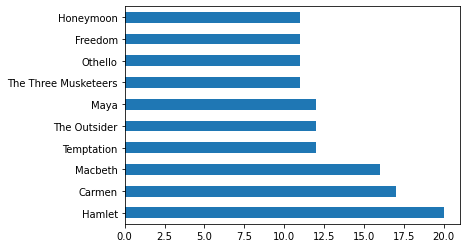

In [957]:
top_ten.plot(kind='barh').agg({'year':'count'}).sort_values(by='year', axis=1);

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [237]:
movies[movies['year'] >= 2000].groupby('year').count().sort_values('year', ascending=True)[:3]


,title
year,
2000,2779
2001,2896
2002,3019


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [947]:
# add column that represent each tens years and group by it
# Detected outlier 2115 year
movies.drop(movies[movies['year'] == 2115].index, inplace=True)

# Add column decades
movies['decades'] = [int(i/10)*10 for i in movies['year']]

In [951]:
# New DF
decades = movies.groupby('decades').count().sort_values('decades', ascending=True).reset_index()
decades.drop('title', axis=1, inplace=True)

decades = decades.rename(columns = {'year':'count'})
# decade['count'] = [np.log10(i) for i in tens['count']]

# decades

In [952]:
x = decades['decades']
y = decades['count']

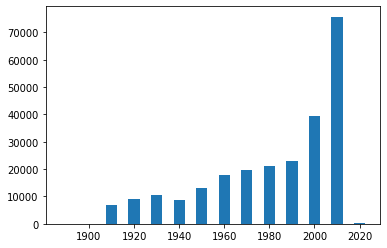

In [954]:
plt.bar(x,y, width=5);

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [485]:
names = cast.groupby('name').count().sort_values('title', ascending=False).reset_index()
names["name"][:10]

0       Bess Flowers
1        Herman Hack
2    Sam (II) Harris
3      Harold Miller
4         Lee Phelps
5     Frank O'Connor
6    Franklyn Farnum
7         Tom London
8       Larry Steers
9        Frank Ellis
Name: name, dtype: object

In [492]:
herself =cast[cast['character'] == 'Herself'].groupby('name').count().sort_values('title', ascending=False).reset_index()
herself['name'][0:10]

0        Queen Elizabeth II
1            Joyce Brothers
2               Luisa Horga
3    Mar?a Luisa (V) Mart?n
4           Hillary Clinton
5         Margaret Thatcher
6          In?s J. Southern
7            Marta Berrocal
8             Oprah Winfrey
9            Marilyn Monroe
Name: name, dtype: object

In [493]:
himself =cast[cast['character'] == 'Himself'].groupby('name').count().sort_values('title', ascending=False).reset_index()
himself['name'][0:10]

0             Adolf Hitler
1            Richard Nixon
2            Ronald Reagan
3          John F. Kennedy
4           George W. Bush
5        Winston Churchill
6       Martin Luther King
7             Bill Clinton
8               Ron Jeremy
9    Franklin D. Roosevelt
Name: name, dtype: object

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [510]:
zombie = cast[cast['character'].str.startswith('Zombie')].groupby("character").count()
zombie = zombie.sort_values('title', ascending=False)
for i in zombie.index[:10]:
    print(i)

Zombie
Zombie Horde
Zombie - Protestor - Victim
Zombie Extra
Zombie Dancer
Zombie Girl
Zombie #1
Zombie #2
Zombie Vampire
Zombie Victim


In [511]:
police = cast[cast['character'].str.startswith('Police')].groupby("character").count()
police = police.sort_values('title', ascending=False)
for i in police.index[:10]:
    print(i)

Policeman
Police Officer
Police Inspector
Police Sergeant
Police officer
Police
Policewoman
Police Chief
Police Captain
Police Commissioner


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

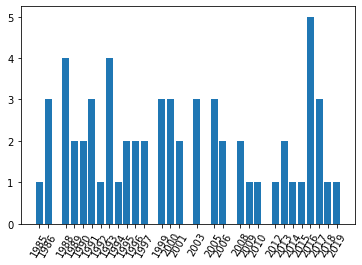

In [533]:
keanu = cast[cast['name'] == 'Keanu Reeves'].groupby('year').count().sort_values('year')
y = keanu.iloc[:, 0]
x = keanu.index
plt.xticks(x, rotation=60)
plt.bar(x, y);


### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


In [932]:
keanu = cast[cast['name'] == 'Keanu Reeves'].groupby(['year']).count().sort_values('year').reset_index() 
keanu= pd.DataFrame(keanu.iloc[:,:2])
keanu

,year,title
0,1985,1
1,1986,3
2,1988,4
3,1989,2
4,1990,2
...,...,...
24,2015,1
25,2016,5
26,2017,3
27,2018,1


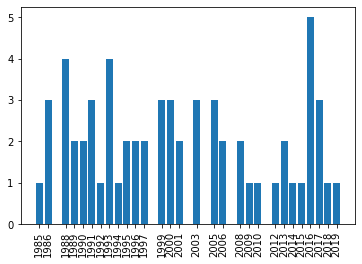

In [934]:
y = [i for i in keanu['title']]
# y = [np.log10(i) for i in keanu['n']]
x = keanu['year']
plt.xticks(x, rotation=90)
plt.bar(x, y);


### Section II - Q7: Plot the number of "Hamlet" films made by each decade

In [614]:
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 20)

In [605]:
# cast[(cast['title'] == 'Hamlet')].sort_values('year')

In [ ]:
cast[(cast['title'] == 'Hamlet') & (cast['year'] == 2010)]

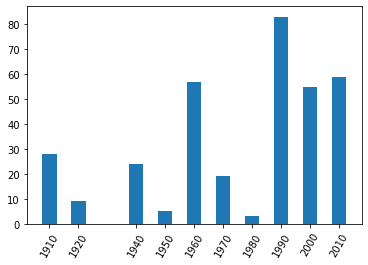

In [612]:
hamlet = cast[cast['title'] == 'Hamlet'].copy()
hamlet['decade'] = [int(i / 10) * 10 for i in hamlet['year']]
hamlet = hamlet.groupby('decade').count().sort_values('decade')
hamlet = pd.DataFrame(hamlet.iloc[:,:1])
x = hamlet.index
y = hamlet['title']
plt.xticks(x, rotation=60)
plt.bar(x, y, width=5);

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [628]:
leading_roles_in_60th = cast[(cast['n'] == 1) & (cast['year'].between(1960, 1969))]['n'].count()
leading_roles_in_60th

11823

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [721]:
frank_list = cast[(cast['name'] == 'Frank Oz')].groupby(['title', 'year']).count().sort_values('name').reset_index().iloc[:,:3]
frank_list = frank_list.rename(columns={'name':'roles'})
frank_list[frank_list['roles'] > 1].sort_values('year')

,title,year,roles
27,The Muppet Movie,1979,8
19,An American Werewolf in London,1981,2
24,The Great Muppet Caper,1981,6
18,The Dark Crystal,1982,2
26,The Muppets Take Manhattan,1984,7
21,Follow That Bird,1985,3
25,The Muppet Christmas Carol,1992,7
22,Muppet Treasure Island,1996,4
20,The Adventures of Elmo in Grouchland,1999,3
23,Muppets from Space,1999,4


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [741]:
frank_characters = cast[(cast['name'] == 'Frank Oz')].groupby([ 'character']).count().sort_values('character').reset_index().iloc[:,:2]
frank_characters = frank_characters.rename(columns={'title':'n_times'})
frank_characters = frank_characters[frank_characters['n_times'] >= 2]
frank_characters.iloc[:,0].to_list()


['Animal',
 'Bert',
 'Cookie Monster',
 'Fozzie Bear',
 'Grover',
 'Miss Piggy',
 'Sam the Eagle',
 'Yoda']

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

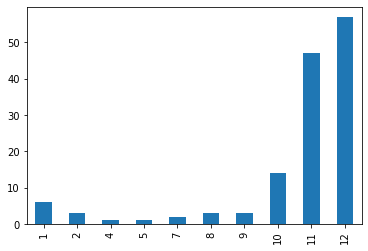

In [854]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar');

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

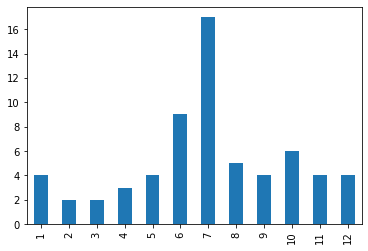

In [848]:
christmas = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar');

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

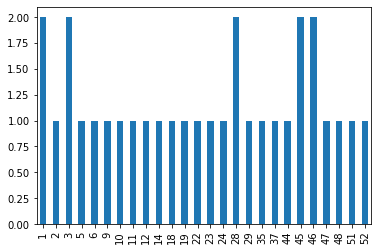

In [850]:
christmas = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
christmas.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar');

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [846]:
keanu_1 = cast[(cast['name'] == 'Keanu Reeves') & (cast['n'] == 1)]
merged = keanu_1.merge(release_dates, on='title', how='left', suffixes=('_keanu', '_release'))
merged = merged[merged['country'] == 'USA'].sort_values('date')[['title','date', 'country']]
keanu_1.sort_values('year')
merged

,title,date,country
446,Speed,1922-10-22,USA
448,Speed,1936-05-08,USA
522,Sweet November,1968-02-08,USA
742,The Night Before,1988-04-15,USA
78,Bill & Ted's Excellent Adventure,1989-02-17,USA
...,...,...,...
9,47 Ronin,2013-12-25,USA
248,John Wick,2014-10-24,USA
407,Knock Knock,2015-10-09,USA
325,John Wick: Chapter 2,2017-02-10,USA


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

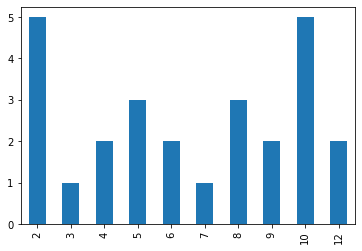

In [852]:
df = merged[merged['country'] == 'USA'].sort_values('date')[['title','date']]
df.date.dt.month.value_counts().sort_index().plot(kind='bar');

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

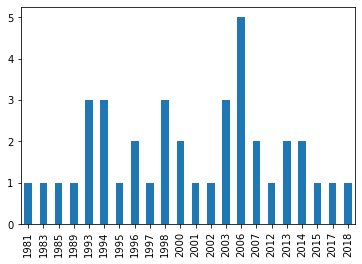

In [853]:
mckellen = cast[(cast['name'] == 'Ian McKellen')]
merged = mckellen.merge(release_dates, on=['title', 'year'], how='left', suffixes=('_mckellen', '_release')).sort_values('date')
merged = merged[merged['country'] == 'USA'].sort_values('date')[['title','date']]
merged['date'] = merged['date'].dt.year
merged.date.value_counts().sort_index().plot(kind='bar');

